In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_circles, make_moons

from sklearn.cluster import KMeans, AgglomerativeClustering

from scipy.cluster.hierarchy import linkage, dendrogram

from skimage.io import imread
from skimage.transform import resize
from mpl_toolkits.mplot3d import Axes3D

<h1>Clustering</h1>

In [3]:
blobs_data, blobs_clusters = make_blobs(n_samples = 300)

In [4]:
blobs_data.shape

(300, 2)

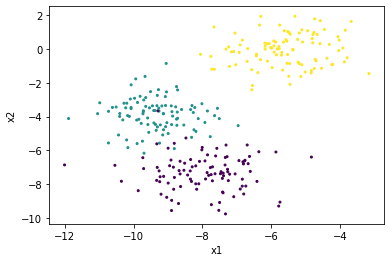

In [5]:
plt.scatter(blobs_data[:, 0], blobs_data[:, 1], s = 4, c = blobs_clusters)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [6]:
k_means = KMeans(n_clusters = 3)

In [7]:
k_means.fit(blobs_data)

KMeans(n_clusters=3)

In [8]:
predictions = k_means.predict(blobs_data)

In [9]:
predictions

array([2, 2, 0, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2, 0,
       2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 0, 1, 2, 1, 2, 2, 2,
       1, 2, 2, 1, 0, 2, 1, 1, 2, 2, 1, 2, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1,
       2, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 0, 1,
       1, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 0, 2,
       2, 2, 1, 0, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 0, 2, 1, 0,
       0, 2, 1, 2, 0, 2, 2, 0, 0, 1, 0, 1, 2, 1, 2, 0, 0, 2, 1, 1, 1, 0,
       2, 2, 0, 2, 0, 1, 2, 1, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 2, 0, 1, 2, 1, 0,
       2, 2, 1, 1, 2, 1, 0, 1, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2,
       1, 1, 1, 0, 0, 0, 2, 1, 2, 1, 2, 0, 2, 1, 0, 0, 1, 2, 2, 2, 1, 0,
       0, 1, 0, 1, 2, 2, 0, 1, 0, 0, 1, 0, 0, 0])

In [10]:
blobs_data, blobs_clusters = make_blobs(n_samples = 300)
def prepare_plot():
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.gca().set_aspect('equal')
    plt.show()
    
def visualize_clustering(data, centers, k= 3, init = 'k-means++'):
    k_means = KMeans(n_clusters = k, init = init)
    
    predictions = k_means.fit_predict(data)
    plt.title('Target')
    plt.scatter(data[:, 0], data[:, 1], s = 4, c = centers)
    prepare_plot()
    
    plt.title('Predictions')
    plt.scatter(data[:, 0], data[:, 1], s = 4, c = predictions)
    plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c = 'r')
    prepare_plot()
    
    return k_means

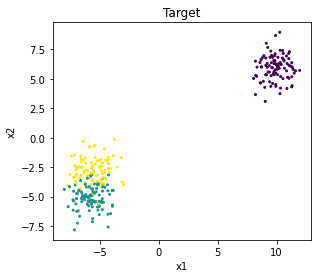

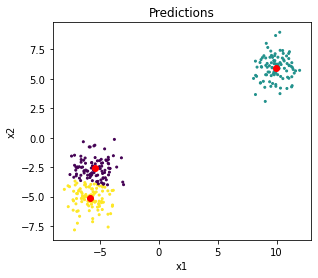

KMeans(n_clusters=3)

In [11]:
visualize_clustering(blobs_data, blobs_clusters)

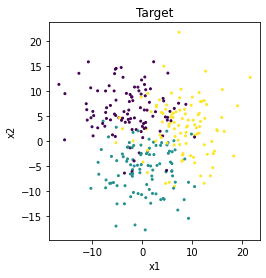

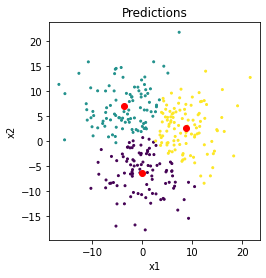

KMeans(n_clusters=3)

In [12]:
blobs_data, blobs_clusters = make_blobs(n_samples = 300, cluster_std = 5)
visualize_clustering(blobs_data, blobs_clusters)

In [13]:
(blobs_clusters == predictions).sum() / len(blobs_clusters)

0.30333333333333334

In [14]:
k_means.cluster_centers_

array([[-9.34743013, -3.90326996],
       [-5.60519226, -0.07822333],
       [-7.9071459 , -7.39998517]])

In [15]:
circles_data, circles_clusters = make_circles(n_samples = 300, factor = 0.1, noise = 0.8)

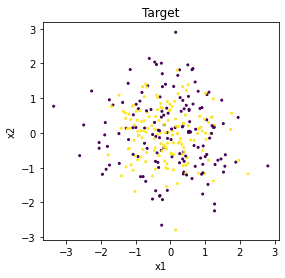

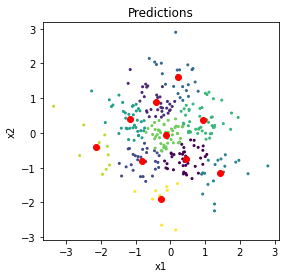

KMeans(n_clusters=10)

In [16]:
k_means_circles = KMeans(n_clusters = 2)
k_means_circles.fit_predict(circles_data)
visualize_clustering(circles_data, circles_clusters, k = 10)

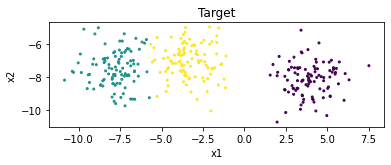

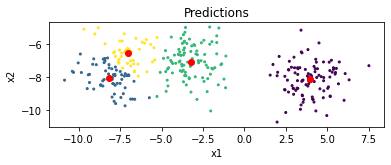

KMeans(init='random', n_clusters=4)

In [17]:
blobs_data, blobs_clusters = make_blobs(n_samples = 300)
visualize_clustering(blobs_data, blobs_clusters, k = 4, init = 'random')

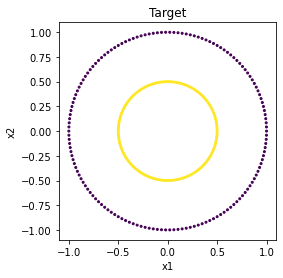

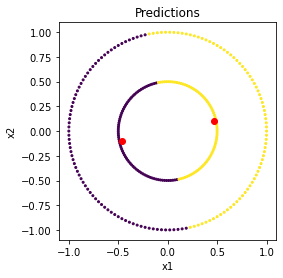

KMeans(init='random', n_clusters=2)

In [18]:
circles_data, circles_clusters = make_circles(n_samples = 300, factor = 0.5)
visualize_clustering(circles_data, circles_clusters, k = 2, init = 'random')

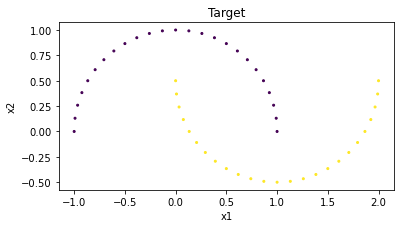

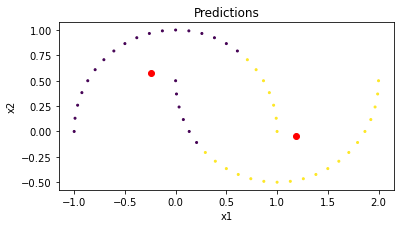

KMeans(n_clusters=2)

In [19]:
moons_data, moons_clusters = make_moons(n_samples = 50)
visualize_clustering(moons_data, moons_clusters, k = 2)

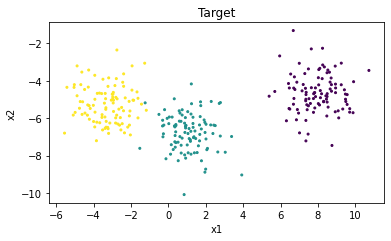

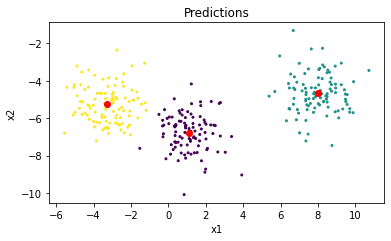

In [20]:
blobs_data, blobs_clusters = make_blobs(n_samples = 300)
k_means = visualize_clustering(blobs_data, blobs_clusters, k = 3)

In [21]:
k_means.inertia_

591.2454590555988

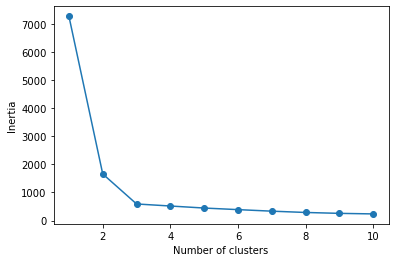

In [22]:
inertias = []
for i in range(1, 11):
    km = KMeans(n_clusters = i)
    km.fit(blobs_data)
    inertias.append(km.inertia_)
    
plt.plot(range(1, 11), inertias, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [23]:
aggl = AgglomerativeClustering(n_clusters = 3)

In [24]:
aggl_predictions = aggl.fit_predict(blobs_data)

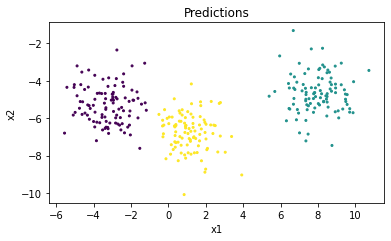

In [25]:
plt.title('Predictions')
plt.scatter(blobs_data[:, 0], blobs_data[:, 1], s = 4, c = aggl_predictions)
prepare_plot()

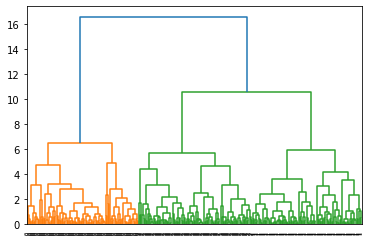

In [26]:
row_clusters = linkage(blobs_data, method = "complete", metric = "euclidean")
dendrogram(row_clusters, labels = blobs_clusters)
plt.show()

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [85.0, 85.0, 95.0, 95.0],
  [60.0, 60.0, 90.0, 90.0],
  [20.0, 20.0, 75.0, 75.0]],
 'dcoord': [[0.0, 4.727549989433034, 4.727549989433034, 0.0],
  [0.0, 4.831858193759178, 4.831858193759178, 0.0],
  [4.727549989433034, 6.481148521764222, 6.481148521764222, 4.831858193759178],
  [0.0, 4.353747758153072, 4.353747758153072, 0.0],
  [0.0, 4.602374599269809, 4.602374599269809, 0.0],
  [4.353747758153072, 5.686657414978184, 5.686657414978184, 4.602374599269809],
  [0.0, 5.928181547787153, 5.928181547787153, 0.0],
  [5.686657414978184, 10.55954822531361, 10.55954822531361, 5.928181547787153],
  [6.481148521764222,
   16.612280147902453,
   16.612280147902453,
   10.55954822531361]],
 'ivl': ['(15)',
  '(55)',
  '(4)',
  '(26)',
  '(3)',
  '(39)',
  '(31)',
  '(29)',
  '(57)',
  '(41)'],
 'leaves': [583, 586, 575, 580,

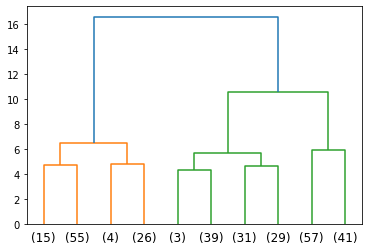

In [27]:
# Show only the last 10 merged clusters
dendrogram(row_clusters, labels = blobs_clusters, truncate_mode = "lastp", p = 10)

In [28]:
# Clustering of image to show colors as cluster. We'll try to find the dominant color
cat_image = imread('https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Cat_November_2010-1a.jpg/1200px-Cat_November_2010-1a.jpg')

In [29]:
cat_image.shape

(1602, 1200, 3)

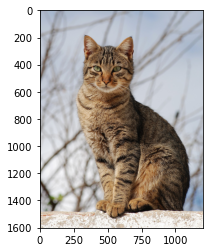

In [30]:
plt.imshow(cat_image)
plt.show()

In [31]:
# Resize the image
cat_image_resized = resize(cat_image, (1068 // 2, 800 // 2))

In [32]:
cat_image_for_modeling = cat_image_resized.reshape(-1, 3)

In [33]:
# Search for clusters
cluster_model = KMeans(10)
clusters = cluster_model.fit_predict(cat_image_for_modeling)

In [34]:
cluster_model.cluster_centers_

array([[0.71325044, 0.73617849, 0.77896725],
       [0.43298938, 0.32462322, 0.23268043],
       [0.14167215, 0.10231535, 0.07498265],
       [0.66941637, 0.56288716, 0.43954505],
       [0.92753089, 0.92125385, 0.91442944],
       [0.62695314, 0.63734411, 0.65995438],
       [0.7943897 , 0.8063756 , 0.82987279],
       [0.28817027, 0.21067203, 0.15107493],
       [0.78982366, 0.70468221, 0.60116509],
       [0.55700571, 0.44156797, 0.3327396 ]])

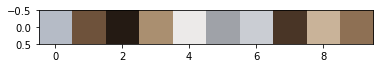

In [35]:
plt.imshow(cluster_model.cluster_centers_.reshape(1, 10, 3))
plt.show()

In [36]:
pd.Series(clusters).groupby(clusters).size()

0    50405
1    15079
2    15223
3    13912
4    14645
5    20058
6    42774
7    16999
8     9060
9    15445
dtype: int64

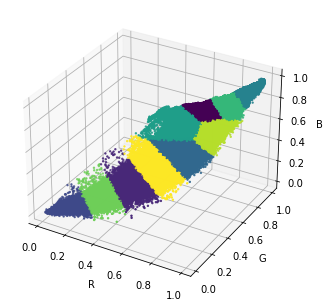

In [37]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(cat_image_for_modeling[:, 0], cat_image_for_modeling[:, 1], cat_image_for_modeling[:, 2], s = 2, c = clusters)
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
plt.show()